In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
url="https://drive.google.com/file/d/1NxPnL9v4J2Py_vicTbFGA4koeGzRKTG0/view?usp=sharing"
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
credit_data = pd.read_csv(url)
credit_data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
from sklearn.model_selection import train_test_split
X = credit_data.iloc[:,2:4]
y = credit_data.iloc[:,1]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
print(y_train)

293    B
332    B
565    M
278    B
489    M
      ..
277    M
9      M
359    B
192    B
559    B
Name: diagnosis, Length: 426, dtype: object


In [ ]:
print(X_train)

     radius_mean  texture_mean
293       11.850         17.46
332       11.220         19.86
565       20.130         28.25
278       13.590         17.84
489       16.690         20.20
..           ...           ...
277       18.810         19.98
9         12.460         24.04
359        9.436         18.32
192        9.720         18.22
559       11.510         23.93

[426 rows x 2 columns]


In [ ]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)

In [ ]:
print(X_train)

[[-6.50799066e-01 -4.30573216e-01]
 [-8.28353412e-01  1.52265465e-01]
 [ 1.68277234e+00  2.18977235e+00]
 [-1.60410871e-01 -3.38290425e-01]
 [ 7.13269245e-01  2.34834278e-01]
 [-5.91614284e-01 -8.08700071e-02]
 [-8.14978287e-02 -7.34135029e-01]
 [-4.50698136e-01 -3.95856006e-02]
 [ 2.84167667e-02  1.01267081e-01]
 [-1.44584797e+00 -4.62143644e-01]
 [-1.97049070e-01 -1.17297425e-01]
 [-1.20713602e+00 -4.76714611e-01]
 [ 1.74969560e-01  1.14309122e+00]
 [-3.35863384e-02 -7.89990402e-01]
 [-1.54774226e-01  1.32522831e+00]
 [-4.05604969e-01 -3.79574831e-01]
 [ 3.75070490e-01  1.78978905e-01]
 [ 1.55594781e+00  5.94251465e-01]
 [-5.23974533e-01 -5.17280731e-02]
 [-8.98811486e-01 -4.93714073e-01]
 [ 8.76731977e-01  1.50250841e+00]
 [-7.69168630e-01 -9.33271578e-01]
 [ 8.14728872e-01 -3.71571061e-02]
 [-1.26590996e-01  3.87829432e-01]
 [ 1.07965123e+00  3.46545026e-01]
 [-1.26590996e-01 -1.34296886e-01]
 [-2.42142237e-01  5.67538026e-01]
 [-1.36017095e+00  6.57392322e-01]
 [-7.52258692e-01 -1

**AlGORITHM**

EUCLIDEAN DISTANCE


In [ ]:
from math import sqrt, pow
def euclidian_distance(x,y):
    distance = 0.0
    for i in range(len(x)):
      distance = distance + pow(x[i] - y[i],2)
    return sqrt(distance)

CALIBRATING NEIGHBOURS BASED ON EUCLID_DISTANCE


In [ ]:
y_train

293    B
332    B
565    M
278    B
489    M
      ..
277    M
9      M
359    B
192    B
559    B
Name: diagnosis, Length: 426, dtype: object

In [ ]:
def neighbours(sample, neighbours_num):
    distances = []
    for i in range(len(X_train) - 1):
      t=euclidian_distance(X_train[i],sample)
      distances.append((y_train.iloc[i], t))
    distances.sort(key=lambda x:x[1])
    neighbours=[]
    for i in range(neighbours_num):
      neighbours.append(distances[i][0])
    return neighbours

In [ ]:
def prediction(test, neighbours_num):
    predictions = []
    for samples in test:
      neighbour = neighbours(samples, neighbours_num)
      labels=[sample for sample in neighbour]
      prediction=max(labels,key=labels.count)
      predictions.append(prediction)
    return predictions

In [ ]:
predict = prediction(X_test, 5)

In [ ]:
print(predict)

['M', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'B', 'B', 'M', 'M', 'M', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'M', 'B', 'B', 'M', 'M', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'M', 'M', 'B', 'B', 'M', 'B', 'M', 'M', 'M', 'B', 'B', 'M', 'B', 'M', 'M', 'M', 'B', 'B', 'B', 'B', 'M', 'M', 'M', 'B', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'M', 'B', 'M', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'M', 'B', 'B', 'B', 'M']


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
confusion = confusion_matrix(y_test, predict) 
print(confusion)
accuracy_score(y_test, predict)

[[81  9]
 [10 43]]


0.8671328671328671

In [ ]:
y_train

293    B
332    B
565    M
278    B
489    M
      ..
277    M
9      M
359    B
192    B
559    B
Name: diagnosis, Length: 426, dtype: object

VISUALISATION


Text(0, 0.5, '')

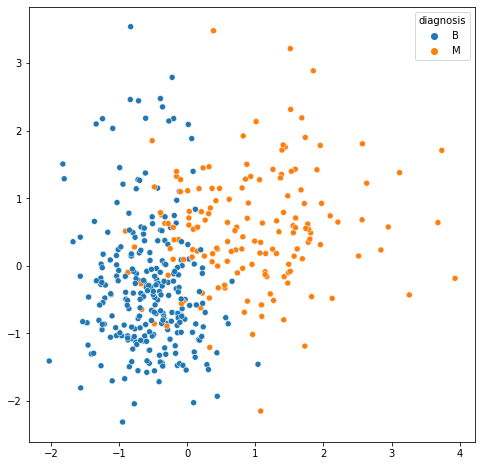

In [ ]:
import seaborn as sns
fig, ax= plt.subplots(figsize=(8,8))
sns.scatterplot(x=X_train[:,0], y=X_train[:,1], hue=y_train)
ax.set_title("")
ax.set_xlabel("")
ax.set_ylabel("")


Text(0, 0.5, 'Accuracy')

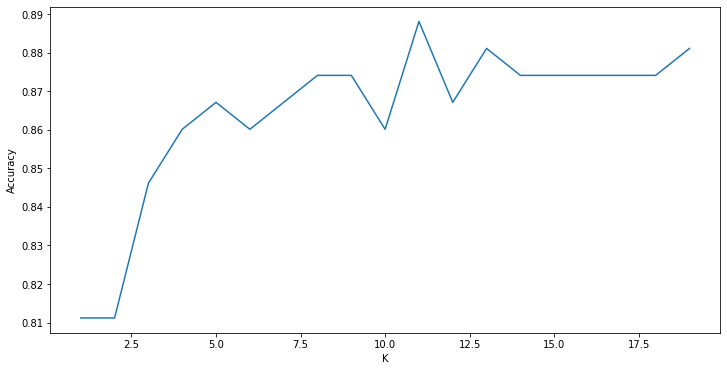

In [ ]:
accs= []
ks= range(1,20)
for k in ks:
    predict = prediction(X_test, k)
    accs.append(accuracy_score(y_test, predict))

fig, ax= plt.subplots(figsize=(12,6))

sns.lineplot(x=ks,y=accs)

ax.set_title("")
ax.set_xlabel("K")
ax.set_ylabel("Accuracy")

